### Проект e-commerce: вариант 1
<!--Скопировал разметку от сюда https://lab.karpov.courses/learning/85/module/1060/lesson/9080/26646/118685/-->
<!--удалил css классы и некотрые символы и отформтировал чтоб читаемо было-->
<p>Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:</p>
1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)</p>
2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)</p>
3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)</p>
4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов)</p>
5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти <a href="ttps://vc.ru/s/productstar/134090-chto-takoe-kogortnyy-analiz" target="_blank">тут</a>. (10 баллов)</p>
6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти <a href="https://guillaume-martin.github.io/rfm-segmentation-with-python.html" target="_blank">тут</a>. (35 баллов)</p>
<br/>
	<b>Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться покупкой. Обосновать свой выбор ты можешь с помощью фактов оплат, статусов заказов и других имеющихся данных.</b>
</p>

<p>— Пример структуры данных можно визуализировать по order_id == 00143d0f86d6fbd9f9b38ab440ac16f5</p>

#### Файлы

##### olist_customers_datase.csv
<ul>
	<li>
		<b>
			<a href="https://disk.yandex.ru/d/FUi5uSd6BfG_ig" target="_blank">olist_customers_datase.csv</a>— таблица с уникальными идентификаторами пользователей</b>
	</li>
</ul>
<p>
	<i>
		<font color="#ff5533">customer_id </font>
	</i>— позаказный идентификатор пользователя</p>
<p>
	<i>
		<font color="#ff5533">customer_unique_id </font>
	</i>— уникальный идентификатор пользователя(аналог номера паспорта)</p>
<p>
	<font color="#ff5533">
		<i>customer_zip_code_prefix </i>
	</font>— почтовый индекс пользователя</p>
<p>
	<i>
		<font color="#ff5533">customer_city</font>
	</i> — город доставки пользователя</p>
<p>
	<i>
		<font color="#ff5533">customer_state</font>
	</i> — штат доставки пользователя</p>

##### olist_orders_dataset.csv
<ul>
	<li>
		<b>
			<a href="https://disk.yandex.ru/d/t9Li4JOfgxuUrg" target="_blank">olist_orders_dataset.csv</a>—таблица заказов</b>
	</li>
</ul>
<p>
	<i>
		<font color="#ff5533">order_id</font>
	</i> — уникальный идентификатор заказа (номер чека)</p>
<p>
	<i>
		<font color="#ff5533">customer_id</font>
	</i> — позаказный идентификатор пользователя</p>
<p>
	<i>
		<font color="#ff5533">order_status</font>
	</i> — статус заказа</p>
<p>
	<font color="#ff5533">
		<i>order_purchase_timestamp </i>
	</font>— время создания заказа</p>
<p>
	<i>
		<font color="#ff5533">order_approved_at </font>
	</i>— время подтверждения оплаты заказа</p>
<p>
	<i>
		<font color="#ff5533">order_delivered_carrier_date</font>
	</i> — время передачи заказа в логистическую службу</p>
<p>
	<font color="#ff5533">
		<i>order_delivered_customer_date</i>
	</font> — время доставки заказа</p>
<p>
	<i>
		<font color="#ff5533">order_estimated_delivery_date</font>
	</i> — обещанная дата доставки</p>

##### olist_order_items_dataset.csv
<ul>
	<li>
		<a href="https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw" target="_blank">olist_order_items_dataset.csv</a>— <b>товарные позиции, входящие в заказы</b>
	</li>
</ul>
<p>
	<i>
		<font color="#ff5533">order_id</font>
	</i> — уникальный идентификатор заказа (номер чека)</p>
<p>
	<i>
		<font color="#ff5533">order_item_id</font>
	</i> — идентификатор товара внутри одного заказа</p>
<p>
	<font color="#ff5533">
		<i>product_id</i>
	</font> — ид товара (аналог штрихкода)</p>
<p>
	<i>
		<font color="#ff5533">seller_id</font>
	</i>—ид производителя товара</p>
<p>
	<i>
		<font color="#ff5533">shipping_limit_date</font>
	</i> — максимальная дата доставки продавцом для передачи заказа партнеру по логистике</p>
<p>
	<font color="#ff5533">
		<i>price</i>
	</font> — цена за единицу товара</p>
<p>
	<i>
		<font color="#ff5533">freight_value</font>
	</i> — вес товара</p>

#### Статусы заказов в таблице <font color="#ff5533">olist_orders_dataset:</font>
<ul>
	<li>created — создан</li>
</ul>
<ul>
	<li>approved — подтверждён</li>
</ul>
<ul>
	<li>invoiced — выставлен счёт</li>
</ul>
<ul>
	<li>processing — в процессе сборки заказа</li>
</ul>
<ul>
	<li>shipped — отгружен со склада</li>
</ul>
<ul>
	<li>delivered — доставлен пользователю </li>
</ul>
<ul>
	<li>unavailable — недоступен</li>
</ul>
<ul>
	<li>canceled — отменён</li>
</ul>

In [109]:
# в этом блоке будем импортировать нужные зависимости и библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import Configs.configsutils as utils

%matplotlib inline

### 1. Подготовим источники данных и входные параметры

#### 1.1 Источники данных

<p>У нас есть 3 CSV-файла которые на момент 2022.06.07 доступны на Яндекс диске</p>

<p>Что бы не тащить большие файлы в репозиторий сделаем 2 JSON файла формата:</p>

<code>
<pre>
{
    "sources" : {
        "data_src_name" : {
            "name" : "file.csv",
            "src"  : "../../../first_project_data/file.csv"
        }
    }
}
</pre>
</code>

<ul>
    <li><font color="#ff5533">data_src_local.json</font> первый будет ссылаться на локальные файлы</li>
    <li><font color="#ff5533">data_src_remote.json</font> второй будет ссылаться на файлы расположенные удалленно</li>
</ul>

<p>файлы можно найти в директории <font color="#ff5533">Configs</font>

#### ВАЖНО!:
<font color="#ff5533">data_src_remote.json</font> сейчас содержит не валидные ссылки на Яндекс.Диск, по этому дальше будем работать с локальной копией.

#### 1.2 Входные параметры

<p>Определим <font color="#ff5533">main_config.json</font> для хранения и настройки входных данных например ввиде профайлов</p>

<p>файл можно найти в директории <font color="#ff5533">Configs</font> 

In [3]:
# определим data source names (aka prefix dsn):
dsn_olist_customers_dataset = "olist_customers_dataset"
dsn_olist_order_items_dataset = "olist_order_items_dataset"
dsn_olist_orders_dataset = "olist_orders_dataset"

# определим с какими данные работаем (local|remote)
profile = "local"
# profile = "remote"

# определяем путь до основного кофига
config_dir = './Configs'
main_config_path = f'{config_dir}/main_config.json'

In [4]:
# считываем основной конфиг
main_config = utils.Config(utils.read_json(main_config_path), config_dir)

main_config.select_profile(profile)

print(f'текущий профиль: {profile} : {main_config.current.path}')

# считываем конфиг источника данных

data_src = utils.DataCollection(utils.read_json(main_config.current.path))

текущий профиль: local : ./Configs/data_src_local.json


In [5]:
# проверим конфиг данных
# по заданию у нас три файла
files = [dsn_olist_customers_dataset, dsn_olist_order_items_dataset, dsn_olist_orders_dataset]

actual = utils.test_DataCollection(data_src, files, main_config.current.path)

print(actual)

(True, 'тексты пройдены')


### 2. Считываем данные

#### Описание olist_customers_datase.csv
таблица с уникальными идентификаторами пользователей
<font size="-1">
<br/>
	<i>
		<font color="#ff5533">customer_id </font>
	</i>— позаказный идентификатор пользователя
<br/>
	<i>
		<font color="#ff5533">customer_unique_id </font>
	</i>— уникальный идентификатор пользователя(аналог номера паспорта)
<br/>
	<font color="#ff5533">
		<i>customer_zip_code_prefix </i>
	</font>— почтовый индекс пользователя
<br/>
	<i>
		<font color="#ff5533">customer_city</font>
	</i> — город доставки пользователя
<br/>
	<i>
		<font color="#ff5533">customer_state</font>
	</i> — штат доставки пользователя
</font>

In [6]:
df_customers = pd.read_csv(data_src.data[dsn_olist_customers_dataset].src)

#### Описание olist_orders_dataset.csv
таблица заказов
<font size="-1">
<br/>
	<i>
		<font color="#ff5533">order_id</font>
	</i> — уникальный идентификатор заказа (номер чека)
<br/>
	<i>
		<font color="#ff5533">customer_id</font>
	</i> — позаказный идентификатор пользователя
<br/>
	<i>
		<font color="#ff5533">order_status</font>
	</i> — статус заказа
<br/>
	<font color="#ff5533">
		<i>order_purchase_timestamp </i>
	</font>— время создания заказа
<br/>
	<i>
		<font color="#ff5533">order_approved_at </font>
	</i>— время подтверждения оплаты заказа
<br/>
	<i>
		<font color="#ff5533">order_delivered_carrier_date</font>
	</i> — время передачи заказа в логистическую службу
<br/>
	<font color="#ff5533">
		<i>order_delivered_customer_date</i>
	</font> — время доставки заказа
</font>

In [33]:
# определим имена колонок которые нужно распарсить как datetime
orders_date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
df_orders = pd.read_csv(data_src.data[dsn_olist_orders_dataset].src, parse_dates=orders_date_columns)

#### Описание olist_order_items_dataset.csv
товарные позиции, входящие в заказы
<font size="-1">
<br/>
	<i>
		<font color="#ff5533">order_id</font>
	</i> — уникальный идентификатор заказа (номер чека)
<br/>
	<i>
		<font color="#ff5533">order_item_id</font>
	</i> — идентификатор товара внутри одного заказа
<br/>
	<font color="#ff5533">
		<i>product_id</i>
	</font> — ид товара (аналог штрихкода)
<br/>
	<i>
		<font color="#ff5533">seller_id</font>
	</i>—ид производителя товара
<br/>
	<i>
		<font color="#ff5533">shipping_limit_date</font>
	</i> — максимальная дата доставки продавцом для передачи заказа партнеру по логистике
<br/>
	<font color="#ff5533">
		<i>price</i>
	</font> — цена за единицу товара
<br/>
	<i>
		<font color="#ff5533">freight_value</font>
	</i> — вес товара
</font>

In [34]:
# определим имена колонок которые нужно распарсить как datetime
orders_items_date_columns = ['shipping_limit_date']
df_order_items = pd.read_csv(data_src.data[dsn_olist_order_items_dataset].src, parse_dates=orders_items_date_columns)

### Вопрос 1 
Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)

In [9]:
# из описания данных поле order_approved_at это время подтверждения опраты
# создаем колонку с меткой что оплата была получена
df_orders['paided'] = ~df_orders.order_approved_at.isna()

In [10]:
print(f'''все статусы:
\t{df_orders.order_status.unique()}

статусы оплаченых заказов:
\t{df_orders[df_orders.paided].order_status.unique()}

статусы НЕ оплаченных заказов:
\t{df_orders[~df_orders.paided].order_status.unique()}
''')

все статусы:
	['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']

статусы оплаченых заказов:
	['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'approved']

статусы НЕ оплаченных заказов:
	['canceled' 'delivered' 'created']



In [11]:
# статусы заказов которые не позволяют сказать что совершена покупка
not_paided_statuses = ['unavailable' 'canceled']

In [12]:
# фильтруем по критериям того что покупка совершена (прошел платеж и подходящий статус)
# подмерживаем к таблице с пользователями чтоб сгрупировать по уникальным ID
df_customer_vs_order_count = df_orders.query('order_status not in @not_paided_statuses and paided') \
    .groupby(by='customer_id', as_index=False) \
    .agg({'paided':'sum'}) \
    .rename(columns={'paided':'count_paided_orders'}) \
    .merge(df_customers[['customer_id', 'customer_unique_id']], on='customer_id') \
    .groupby(by='customer_unique_id', as_index=False) \
    .agg({'count_paided_orders':'sum'}) \
    .sort_values('count_paided_orders', ascending=False)

In [13]:
df_customer_vs_order_count.head()

,customer_unique_id,count_paided_orders
52925,8d50f5eadf50201ccdcedfb9e2ac8455,17
23450,3e43e6105506432c953e165fb2acf44c,9
10344,1b6c7548a2a1f9037c1fd3ddfed95f33,7
37764,6469f99c1f9dfae7733b25662e7f1782,7
76005,ca77025e7201e3b30c44b472ff346268,7


In [14]:
# отфильтруем тех пользователей у которых есть только одна покупка
print(f'одну покупку совержили: {df_customer_vs_order_count.query("count_paided_orders == 1").shape[0]}')

одну покупку совержили: 93049


#### Вопрос 1 (ответ) 
Итого у нас <font color="#ff5533">93049</font> пользователей, которые совершили покупку только один раз

# Вопрос 2
Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)

In [88]:
# в датасете с товарными позициями есть колонка
# shipping_limit_date - максимальная максимальная дата доставки продавцом для передачи заказа партнеру по логистике
# подмержим эти данные к основному датасету с заказами
 
df_order_shipping_limit_date = df_order_items.groupby(by='order_id', as_index=False).shipping_limit_date.first()

df_o = df_orders.merge(df_order_shipping_limit_date, on='order_id', how='left')

In [89]:
# Предполагаемый месяц доставки
df_o['estimated_month'] = df_o.order_estimated_delivery_date.dt.month_name()

# Фактический месяц доставки клиенту
# df_o['delivered_month'] = df_o.order_delivered_customer_date.dt.month_name()

# округляем даты до год-месяц
estimated_y_m = df_o.order_estimated_delivery_date.dt.to_period('M')
real_y_m = df_o.order_delivered_customer_date.dt.to_period('M')

# Доставлен в Пердполагаемом месяце
df_o['delivered_at_estimated_month'] = estimated_y_m == real_y_m

# Доставлен раньше Пердполагаемого месяца
df_o['delivered_earlier'] = estimated_y_m > real_y_m

# Опоздал ли продавец?
df_o['shipping_late'] = df_o.order_delivered_carrier_date > df_o.shipping_limit_date

# Оплачен ли заказ? 
df_o['paided'] = ~df_o.order_approved_at.isna()

#### Майним причины

In [178]:
# берем причины из имеющихся
df_o['reason'] = df_o.order_status

# не доставлено и не оплачено
# df_o.loc[(~df_o.delivered_at_estimated_month & ~df_o.paided), 'reason'] = 'not_paided'

# не доставлено, но доставлено раньше 
df_o.loc[(~df_o.delivered_at_estimated_month & df_o.delivered_earlier), 'reason'] = 'delivered_earlier'

# не доставлено и продавец опаздал
df_o.loc[(~df_o.delivered_at_estimated_month & df_o.shipping_late), 'reason'] = 'shipping_late'

#### Метод для вывода ответа

DRY

In [186]:
def question2(df, filter):
    df = df.query('reason not in @filter')
    # подсчитываем средне-месячное число не доставляемых заказов 
    monthly_mean = df.groupby(by='estimated_month').order_id.count().mean()

    print(f'средне-месячное число не доставленных заказов: {round(monthly_mean, 2)}')

    # выводим распредение по причинам:
    ax = sns.displot(df, x='reason', aspect=3)
    ax.axes.flat[0].set_title('Распредение по причинам')

#### С учетом доставленных раньше планируемого месяца

средне-месячное число не доставленных заказов: 3662.25


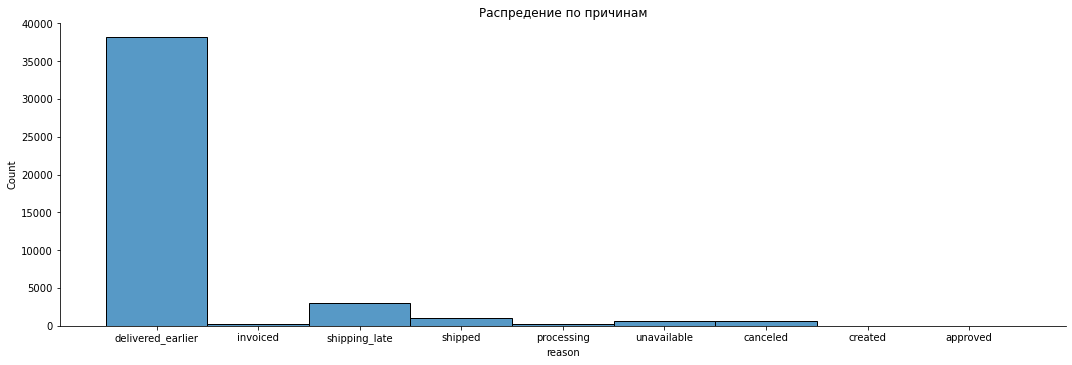

In [183]:
reasons = ['delivered']
question2(df_o, reasons)

#### Без учета доставленных раньше планируемого месяца
то есть будем считать такие заказы доставлеными

средне-месячное число не доставленных заказов: 482.08


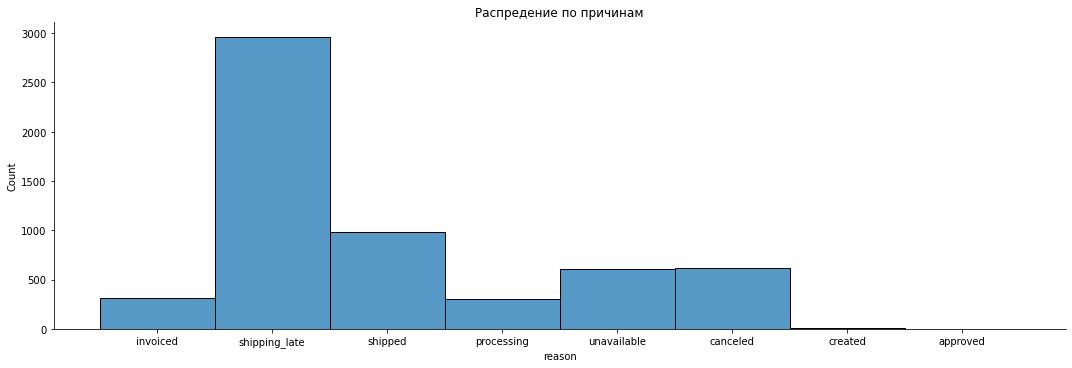

In [185]:
reasons = ['delivered', 'delivered_earlier']
question2(df_o, reasons)

#### Вывод

* Если учитывать что случаи когда доставка была совершена раньше предполагаемой **(delivered_earlier)**, то можно сказать что довольно часто даем писсимистическую оценку о дате предполагаемой доставки
* среди других причени довольно часто встречется **shipping_late** - опаздывающие продовцы